Solving the 2-D laplace using natural order matrix (Inspired by Wen Shen lecture)

In [97]:
import numpy as np
import scipy.sparse as spa
import scipy.sparse.linalg as spalg
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

#### Assuming a square grid to start (NXN)

In [4]:
N = 101

#### Using Dirichlet B.C.s we can compute the potential of the inner square by solivng (N-2)*(N-2) equations. 
#### Patterns recognized by setting up the matrices have allowed us to organize sub-matrices in an organized way

In [52]:
D = np.zeros(((N-2),(N-2)))
I = np.eye((N-2),(N-2))

#### Populate D matrix

In [53]:
off_diag = np.ones((1,(N-3)))[0]
on_diag = np.ones((1,(N-2)))[0]*(-4)

In [54]:
D = D + np.diag(off_diag,k=1) + np.diag(off_diag,k=-1) + np.diag(on_diag)

In [56]:
A = np.zeros(((N-2)**2,(N-2)**2))

In [72]:
for i in range(0,N-2):
    A[0+(i*(N-2)):N-2+(i*(N-2)),0+(i*(N-2)):N-2+(i*(N-2))] = D
for i in range(1,N-2):
    A[(i*(N-2)):(i*(N-2)+(N-2)),(i*(N-2)-(N-2)):(i*(N-2))] = I
    A[(i*(N-2)-(N-2)):(i*(N-2)),(i*(N-2)):(i*(N-2)+(N-2))] = I

In [78]:
b = np.zeros(((N-2)*(N-2),1))

In [99]:
b[(N-3)*(N-2):(N-2)*(N-2)] = np.ones(((N-2),1))*-100
b[0:(N-2)] = np.ones(((N-2),1))*100

In [100]:
A_spa = spa.csc_matrix(A)
U = spalg.spsolve(A_spa,b)

In [101]:
U_mat = np.reshape(U,((N-2),(N-2)))

In [102]:
x = np.arange(0,N-2)
y = np.arange(0,N-2)
X,Y = np.meshgrid(x,y)

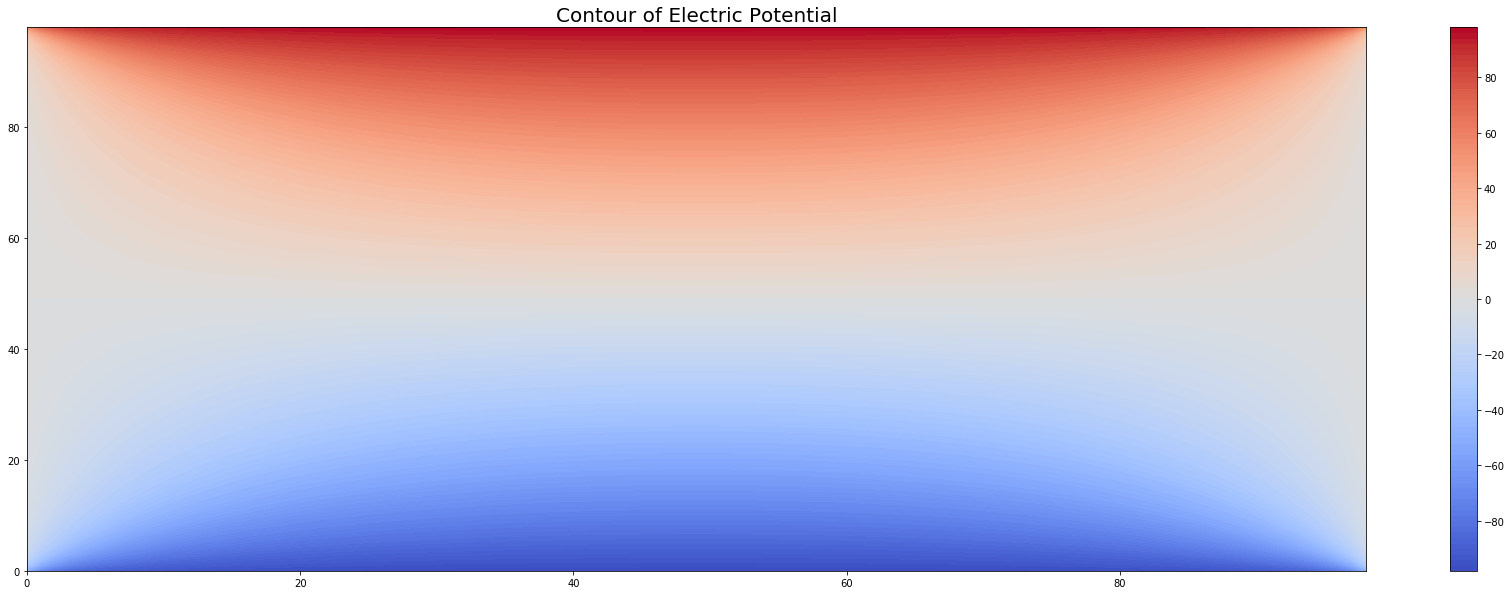

In [103]:
#Set interpolation and colormap
colorinterp = 100
colormap = plt.cm.coolwarm
figure = plt.figure(figsize=(30,10))
plt.contourf(X,Y,U_mat, colorinterp, cmap=colormap)
plt.title("Contour of Electric Potential", fontsize=20)
#Set Colorbar
plt.colorbar()
#Show the result in the plot winow
plt.show()
print("")